In [1]:
import sys, os

# assume notebook lives in curiosity-ltv-id/notebooks/
ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, ROOT)
print("Added to PYTHONPATH:", ROOT)

Added to PYTHONPATH: /Users/shivashakeri/Documents/github/curiosity-ltv-id


In [2]:
# Define the raw-data base directory from project root
RAW_BASE = os.path.join(ROOT, "data", "raw", "data", "data")

In [3]:
from src.io_utils import load_channel_data, get_anomaly_windows

# 1) Test loading the full test trace for M-6
data_test = load_channel_data("M-6", split="test", base_dir=RAW_BASE)
print("Loaded test data shape:", data_test.shape)

# 2) Test pulling its anomaly windows
aw = get_anomaly_windows("M-6", spacecraft="MSL",
                         labels_csv=os.path.join(ROOT, "data", "raw", "labeled_anomalies.csv"))
print("Anomaly windows for M-6:", aw)

Loaded test data shape: (2049, 55)
Anomaly windows for M-6: [[1850, 2030]]


In [9]:
from src.ltv_id import process_channel

theta_df, rmse_df = process_channel(
    chan="M-6",
    y_chan=5,
    spacecraft="MSL",
    split="test",
    raw_base=RAW_BASE,
    labels_csv=os.path.join(ROOT, "data", "raw", "labeled_anomalies.csv"),
    out_dir=os.path.join(ROOT, "data", "processed")
)

print("θ shape:", theta_df.shape)
print("RMSE shape:", rmse_df.shape)

θ shape: (200, 4)
RMSE shape: (200, 1)


In [10]:
import os
import pandas as pd

proc_dir = os.path.join(ROOT, "data", "processed")
print("Processed files:", os.listdir(proc_dir))

# Load the M-6 results
theta_df = pd.read_csv(os.path.join(proc_dir, "M-6_thetas.csv"))
rmse_df  = pd.read_csv(os.path.join(proc_dir, "M-6_rmses.csv"))

print("\nM-6_thetas.csv (first 5 rows):")
display(theta_df.head())

print("\nM-6_rmses.csv (first 5 rows):")
display(rmse_df.head())

Processed files: ['M-6_rmses.csv', 'arx_thetas_full.csv', 'M-6_thetas.csv', 'arx_rmses_full.csv']

M-6_thetas.csv (first 5 rows):


,-a1,-a2,b1,b2
0,0.273322,0.262799,-0.189278,-0.189278
1,0.249431,0.139932,-0.172213,-0.172213
2,0.332086,0.248752,-0.214072,-0.214072
3,0.269481,0.087662,-0.180060,-0.180060
4,0.363636,0.055944,-0.181818,-0.181818



M-6_rmses.csv (first 5 rows):


,rmse
0,0.408081
1,0.418235
2,0.414923
3,0.429411
4,0.404664


In [12]:
import os

# You already have ROOT set to the project root
processed_dir = os.path.join(ROOT, "data", "processed")
print("Looking in:", processed_dir)

Looking in: /Users/shivashakeri/Documents/github/curiosity-ltv-id/data/processed


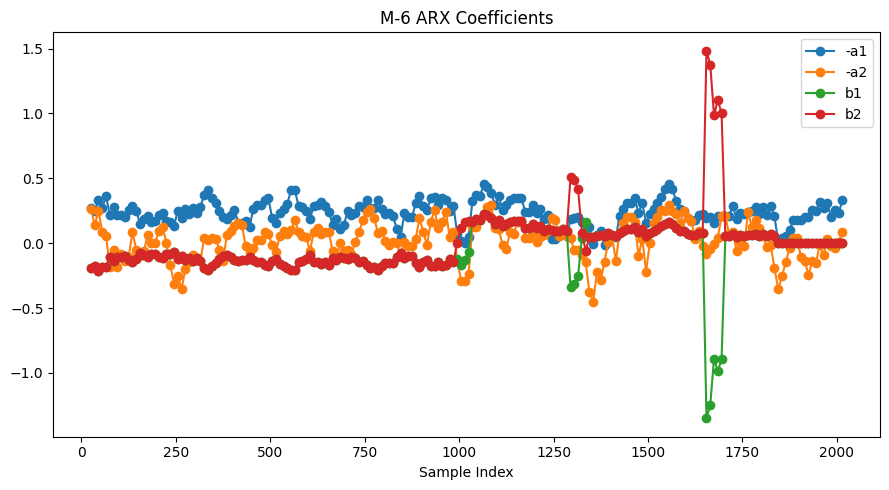

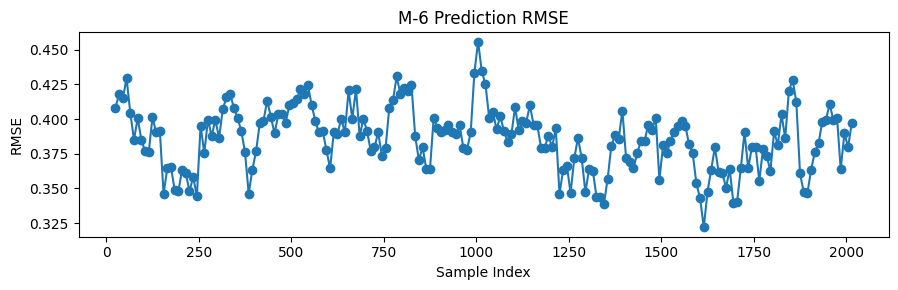

In [13]:
from src.validate import plot_channel_results

plot_channel_results("M-6", win_size=50, hop=10, out_dir=processed_dir)

In [2]:
import os
import pandas as pd
import numpy as np

# Ensure all paths are relative to the notebook location
NB_DIR = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
os.chdir(NB_DIR)

base_dir   = os.path.join("..", "data", "raw", "data", "data")
train_dir  = os.path.join(base_dir, "train")
test_dir   = os.path.join(base_dir, "test")
labels_csv = os.path.join("..", "data", "raw", "labeled_anomalies.csv")

print("Base folders in '../data/raw':", os.listdir(os.path.join("..", "data", "raw")))
print("Inner folders in '../data/raw/data':", os.listdir(os.path.join("..", "data", "raw", "data")))
print("Train/Test under base_dir:", os.listdir(base_dir))

print("Some train files:", os.listdir(train_dir)[:5])

sample_file = os.listdir(train_dir)[0]
data = np.load(os.path.join(train_dir, sample_file))
print(f"\nLoaded {sample_file!r} → shape {data.shape}")
df = pd.DataFrame(data)
display(df.head())

labels = pd.read_csv(labels_csv)
print("\nAnomaly labels sample:")
display(labels.head())

Base folders in '../data/raw': ['labeled_anomalies.csv', 'data']
Inner folders in '../data/raw/data': ['.DS_Store', 'data']
Train/Test under base_dir: ['.DS_Store', 'test', 'train', '2018-05-19_15.00.10']
Some train files: ['P-7.npy', 'E-8.npy', 'M-1.npy', 'T-3.npy', 'T-2.npy']

Loaded 'P-7.npy' → shape (2853, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.450982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.411767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.411767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.372547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Anomaly labels sample:


,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307


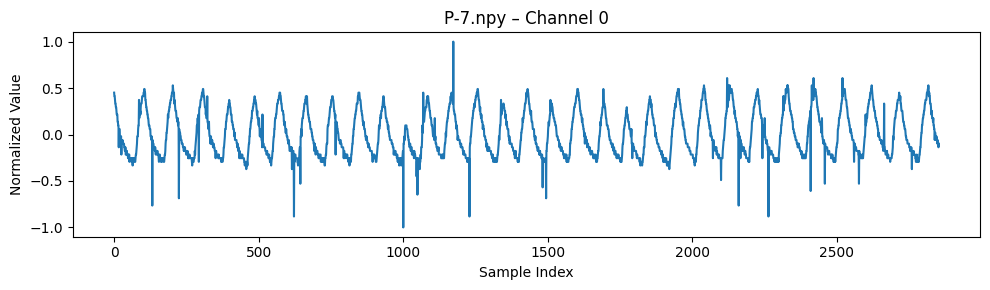

In [3]:
import matplotlib.pyplot as plt

# Plot the first channel of the sample file
plt.figure(figsize=(10, 3))
plt.plot(df.iloc[:, 0])
plt.title(f"{sample_file} – Channel 0")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Value")
plt.tight_layout()
plt.show()

In [4]:
# 1) See what your label columns are:
print("Label columns:", labels.columns.tolist())

# 2) Filter to just this sample’s anomalies:
#    Replace 'sequence' with the actual column name that matches your filenames
file_col = 'sequence' if 'sequence' in labels.columns else labels.columns[0]
anoms_for_sample = labels[labels[file_col] == sample_file]

print(f"\nAnomalies for {sample_file!r}:")
display(anoms_for_sample)

Label columns: ['chan_id', 'spacecraft', 'anomaly_sequences', 'class', 'num_values']

Anomalies for 'P-7.npy':


,chan_id,spacecraft,anomaly_sequences,class,num_values


In [5]:
# Find any sequences with anomalies
anomalous = labels[labels["num_values"] > 0]
display(anomalous.head())

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307


In [6]:
# 1) Filter for Curiosity (MSL) entries
msl_labels = labels[labels["spacecraft"] == "MSL"]
display(msl_labels[["chan_id", "anomaly_sequences", "num_values"]].head())

# 2) Pick your first MSL‐anomalous file
sample_chan = msl_labels.iloc[0]["chan_id"]
sample_file  = f"{sample_chan}.npy"
print("Using sample:", sample_file)

,chan_id,anomaly_sequences,num_values
55,M-6,"[[1850, 2030]]",2049
56,M-1,"[[1110, 2250]]",2277
57,M-2,"[[1110, 2250]]",2277
58,S-2,"[[900, 910]]",1827
59,P-10,"[[4590, 4720]]",6100


Using sample: M-6.npy


In [7]:
# extract the raw list of anomaly intervals for this channel
anomaly_windows = msl_labels.loc[
    msl_labels["chan_id"] == sample_chan, 
    "anomaly_sequences"
].iloc[0]

print("Anomaly windows for", sample_file, ":\n", anomaly_windows)

Anomaly windows for M-6.npy :
 [[1850, 2030]]


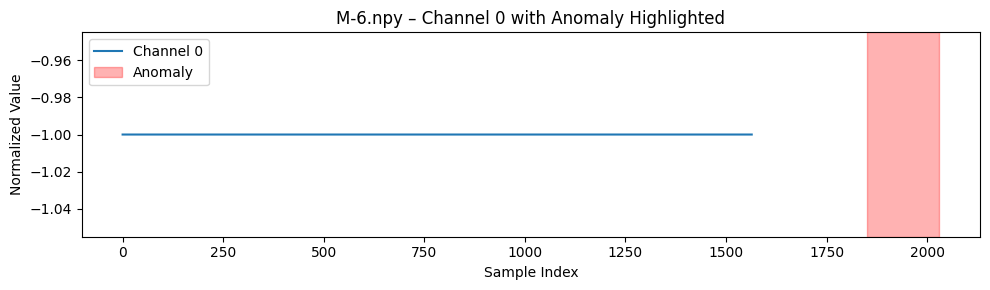

In [8]:
import matplotlib.pyplot as plt
import ast
# reload the data
data = np.load(os.path.join(train_dir, sample_file))
df = pd.DataFrame(data)

anomaly_windows = ast.literal_eval(anomaly_windows)
# get the bounds
start, end = anomaly_windows[0]

# plot and highlight
plt.figure(figsize=(10,3))
plt.plot(df.iloc[:, 0], label="Channel 0")
plt.axvspan(start, end, color="red", alpha=0.3, label="Anomaly")
plt.title(f"{sample_file} – Channel 0 with Anomaly Highlighted")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Value")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# load the same file from test instead of train
test_data = np.load(os.path.join(test_dir, sample_file))
print(f"Test-split {sample_file} shape:", test_data.shape)

Test-split M-6.npy shape: (2049, 55)


In [10]:
# 1) Load the test version of the file
test_data = np.load(os.path.join(test_dir, sample_file))
df_test   = pd.DataFrame(test_data)

# 2) Re-extract the anomaly window from df_test
anomaly_seg = df_test.iloc[start:end].reset_index(drop=True)

# 3) Check it
print("Anomaly segment shape (test):", anomaly_seg.shape)
display(anomaly_seg.head())

Anomaly segment shape (test): (180, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.945946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.945946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.945946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.945946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.945946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


u_anom shape: (180,)
y_anom shape: (180,)


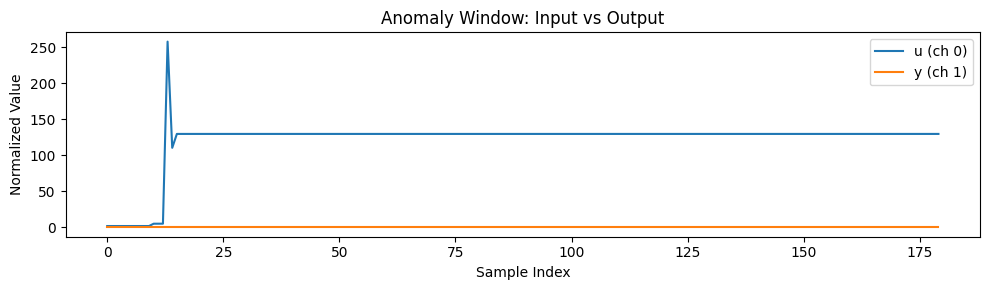

In [11]:
# 1) Define u and y from the anomaly segment
u_anom = anomaly_seg.iloc[:, 0].values
y_anom = anomaly_seg.iloc[:, 1].values

# 2) Check their shapes
print("u_anom shape:", u_anom.shape)
print("y_anom shape:", y_anom.shape)

# 3) Quick plot to eyeball dynamics
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(u_anom, label="u (ch 0)")
plt.plot(y_anom, label="y (ch 1)")
plt.title("Anomaly Window: Input vs Output")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Value")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
import numpy as np

# orders
na, nb, nk = 2, 2, 1
N = len(y_anom)
max_lag = max(na, nb + nk - 1)

# build regression matrix and output vector
Φ, Y = [], []
for k in range(max_lag, N):
    row = []
    # output lags (−y[k−1], −y[k−2])
    row += [-y_anom[k - i] for i in range(1, na + 1)]
    # input lags (u[k−1], u[k−2])
    row += [ u_anom[k - j] for j in range(nk, nb + nk) ]
    Φ.append(row)
    Y.append(y_anom[k])

Φ = np.vstack(Φ)    # shape (N−max_lag, na+nb)
Y = np.array(Y).ravel()

# solve θ = argmin ||Φθ − Y||₂
θ, *_ = np.linalg.lstsq(Φ, Y, rcond=None)
print("Estimated θ = ", θ)

Estimated θ =  [0. 0. 0. 0.]


Channel with highest variance: 0 (var=1195.034)


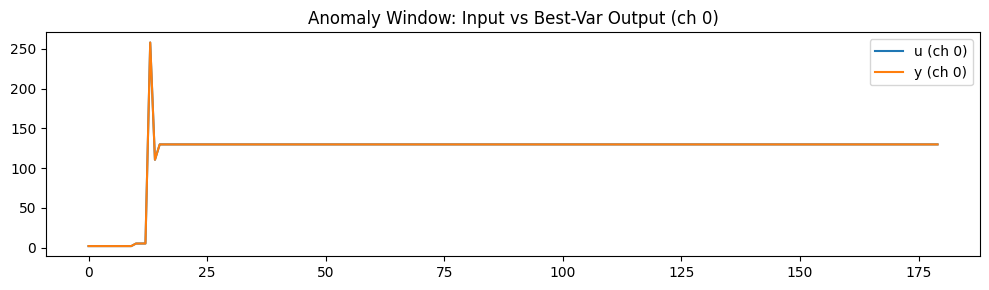

In [13]:
# 1) compute variance per channel
variances = anomaly_seg.var(axis=0)

# 2) find the channel index with highest variance
best_ch = int(variances.idxmax())
print(f"Channel with highest variance: {best_ch} (var={variances[best_ch]:.3f})")

# 3) plot u vs that channel
y_anom_best = anomaly_seg.iloc[:, best_ch].values
plt.figure(figsize=(10,3))
plt.plot(u_anom, label="u (ch 0)")
plt.plot(y_anom_best, label=f"y (ch {best_ch})")
plt.title(f"Anomaly Window: Input vs Best‐Var Output (ch {best_ch})")
plt.legend()
plt.tight_layout()
plt.show()

Top 5 channels by variance: [0, 5, 33, 11, 27]
Using channel 5 as y


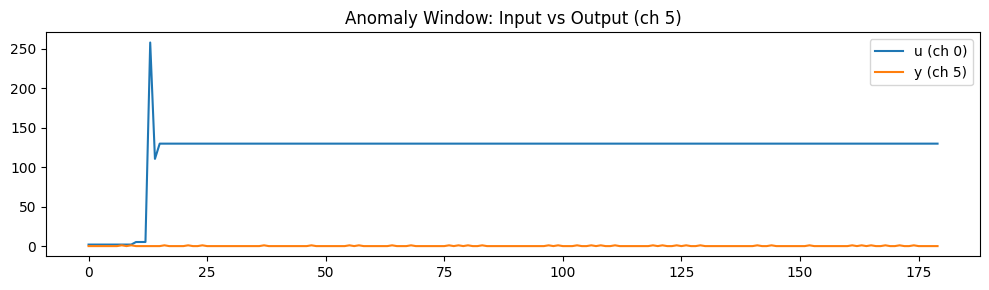

In [14]:
# get the channels sorted by variance (desc)
sorted_chs = variances.sort_values(ascending=False).index.tolist()
print("Top 5 channels by variance:", sorted_chs[:5])

# pick the runner-up as your output
best_ch2 = sorted_chs[1]
print("Using channel", best_ch2, "as y")

# quick plot
y_anom2 = anomaly_seg.iloc[:, best_ch2].values
plt.figure(figsize=(10,3))
plt.plot(u_anom, label="u (ch 0)")
plt.plot(y_anom2, label=f"y (ch {best_ch2})")
plt.title(f"Anomaly Window: Input vs Output (ch {best_ch2})")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Prepare u and y
u = u_anom.reshape(-1, 1)           # input (ch 0)
y = y_anom2.reshape(-1, 1)         # output (ch 5)

# ARX orders
na, nb, nk = 2, 2, 1
N = len(y)
max_lag = max(na, nb + nk - 1)

# Build regression matrix Φ and target Y
Phi, Yvec = [], []
for k in range(max_lag, N):
    # –y[k−1], –y[k−2]
    Phi.append([-y[k - i, 0] for i in range(1, na+1)]
              + [ u[k - j, 0]  for j in range(nk, nb+nk) ])
    Yvec.append(y[k, 0])

Phi = np.vstack(Phi)
Yvec = np.array(Yvec)

# Solve least-squares
θ, *_ = np.linalg.lstsq(Phi, Yvec, rcond=None)
print("Estimated θ = [–a₁, –a₂, b₁, b₂] =\n", θ)

Estimated θ = [–a₁, –a₂, b₁, b₂] =
 [ 0.21224849 -0.07338145  0.00091783  0.00081367]


In [16]:
def fit_arx(u, y, na, nb, nk):
    """Return θ = [–a1, …, –ana, b1, …, bnb] for ARX(na,nb,nk)."""
    N = len(y)
    max_lag = max(na, nb + nk - 1)
    Φ, Yv = [], []
    for k in range(max_lag, N):
        # output lags
        row = [-y[k - i] for i in range(1, na + 1)]
        # input lags
        row += [u[k - j] for j in range(nk, nb + nk)]
        Φ.append(row)
        Yv.append(y[k])
    Φ = np.vstack(Φ)
    Yv = np.array(Yv)
    θ, *_ = np.linalg.lstsq(Φ, Yv, rcond=None)
    return θ

# test it on your anomaly segment:
θ_test = fit_arx(u_anom, y_anom2, na=2, nb=2, nk=1)
print("θ_test:", θ_test)

θ_test: [ 0.21224849 -0.07338145  0.00091783  0.00081367]


In [17]:
# 1) Define window & hop sizes
win_size = 50   # e.g. 50 samples per local fit
hop      = 10   # slide every 10 samples

# 2) Slide across the anomaly segment
thetas = []
for start in range(0, len(u_anom) - win_size + 1, hop):
    u_win = u_anom[start : start + win_size]
    y_win = y_anom2[start : start + win_size]
    θ_win = fit_arx(u_win, y_win, na=2, nb=2, nk=1)
    thetas.append(θ_win)

thetas = np.vstack(thetas)  # shape: (#windows, 4)
print("Computed θ for", thetas.shape[0], "windows.")

Computed θ for 14 windows.


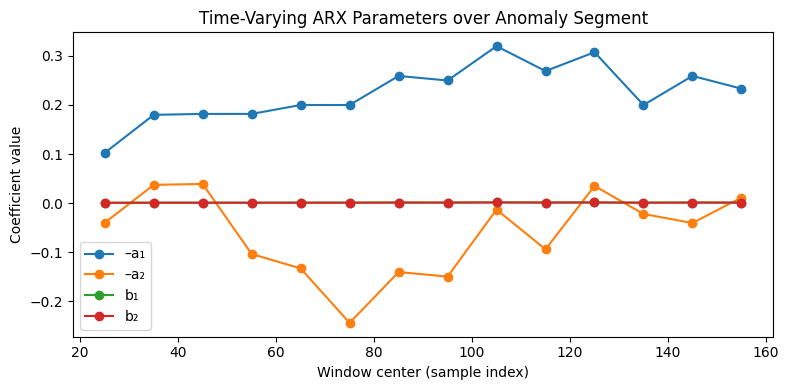

In [18]:
import matplotlib.pyplot as plt

# Compute window‐center indices for x‐axis
centers = np.arange(len(thetas)) * hop + win_size/2

plt.figure(figsize=(8,4))
labels = ['–a₁','–a₂','b₁','b₂']
for i in range(thetas.shape[1]):
    plt.plot(centers, thetas[:, i], marker='o', label=labels[i])

plt.xlabel("Window center (sample index)")
plt.ylabel("Coefficient value")
plt.title("Time‐Varying ARX Parameters over Anomaly Segment")
plt.legend()
plt.tight_layout()
plt.show()

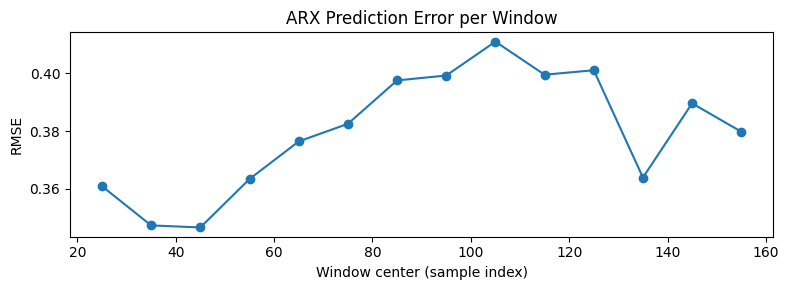

In [19]:
# 1) prepare
na, nb, nk = 2, 2, 1
max_lag = max(na, nb + nk - 1)
rmses = []

# 2) for each fitted θ, compute one‐step–ahead predictions and RMSE
for i, θ in enumerate(thetas):
    start = i * hop
    end   = start + win_size
    u_win = u_anom[start:end]
    y_win = y_anom2[start:end]
    
    # build prediction vector
    y_pred = np.zeros_like(y_win)
    for k in range(max_lag, len(y_win)):
        y_pred[k] = (
            -θ[0] * y_win[k-1]
            -θ[1] * y_win[k-2]
            +θ[2] * u_win[k-1]
            +θ[3] * u_win[k-2]
        )
    
    # compute RMSE excluding the first max_lag samples
    err = y_win[max_lag:] - y_pred[max_lag:]
    rmses.append(np.sqrt(np.mean(err**2)))

# 3) plot RMSE over windows
plt.figure(figsize=(8,3))
plt.plot(centers, rmses, '-o')
plt.xlabel("Window center (sample index)")
plt.ylabel("RMSE")
plt.title("ARX Prediction Error per Window")
plt.tight_layout()
plt.show()

Clean-window ARX θ =  [ 0.28571429 -0.01428571  0.0734127   0.0734127 ]


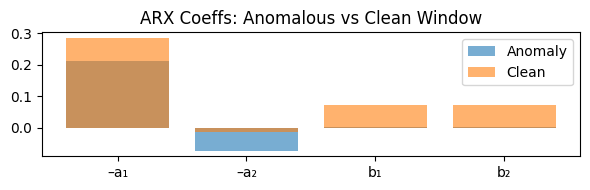

In [20]:
# 1) Define orders & window size
na, nb, nk = 2, 2, 1
win_size = 50

# 2) Compute the start of that clean window
anom_start = anomaly_windows[0][0]  # 1850
clean_start = anom_start - win_size
assert clean_start >= 0, "Not enough data before anomaly!"

# 3) Extract u/y from the clean window
u_clean = df_test.iloc[clean_start:clean_start+win_size, 0].values
y_clean = df_test.iloc[clean_start:clean_start+win_size, best_ch2].values

# 4) Fit ARX on the clean segment
θ_clean = fit_arx(u_clean, y_clean, na, nb, nk)
print("Clean-window ARX θ = ", θ_clean)

# 5) Quick plot comparison
plt.figure(figsize=(6,2))
plt.bar(range(len(θ_test)), θ_test, alpha=0.6, label="Anomaly")
plt.bar(range(len(θ_clean)), θ_clean, alpha=0.6, label="Clean")
plt.xticks(range(len(θ_test)), ['–a₁','–a₂','b₁','b₂'])
plt.legend()
plt.title("ARX Coeffs: Anomalous vs Clean Window")
plt.tight_layout()
plt.show()

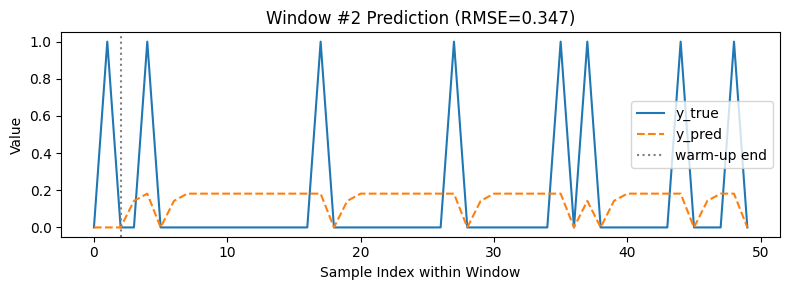

In [21]:
# 1) find best window
best_idx = int(np.argmin(rmses))
best_theta = thetas[best_idx]
start = best_idx * hop
end   = start + win_size

# 2) grab u/y for that window
u_win = u_anom[start:end]
y_win = y_anom2[start:end]

# 3) simulate 1-step ahead ŷ
y_pred = np.zeros_like(y_win)
for k in range(max_lag, len(y_win)):
    y_pred[k] = (
        -best_theta[0] * y_win[k-1]
        -best_theta[1] * y_win[k-2]
        + best_theta[2] * u_win[k-1]
        + best_theta[3] * u_win[k-2]
    )

# 4) plot true vs predicted
plt.figure(figsize=(8,3))
plt.plot(y_win,   label="y_true")
plt.plot(y_pred, '--', label="y_pred")
plt.axvline(max_lag, color='gray', linestyle=':', label='warm‐up end')
plt.title(f"Window #{best_idx} Prediction (RMSE={rmses[best_idx]:.3f})")
plt.xlabel("Sample Index within Window")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# full-test sliding
u_full = df_test.iloc[:, 0].values
y_full = df_test.iloc[:, best_ch2].values

thetas_full, rmses_full = [], []
for start in range(0, len(u_full) - win_size + 1, hop):
    u_win = u_full[start : start + win_size]
    y_win = y_full[start : start + win_size]
    θ_win = fit_arx(u_win, y_win, na=2, nb=2, nk=1)
    thetas_full.append(θ_win)
    # compute RMSE for this window
    pred = np.zeros_like(y_win)
    for k in range(max_lag, len(y_win)):
        pred[k] = (
            -θ_win[0]*y_win[k-1]
            -θ_win[1]*y_win[k-2]
            +θ_win[2]*u_win[k-1]
            +θ_win[3]*u_win[k-2]
        )
    err = y_win[max_lag:] - pred[max_lag:]
    rmses_full.append(np.sqrt(np.mean(err**2)))

thetas_full = np.vstack(thetas_full)
print(f"Sliding across full test: {thetas_full.shape[0]} windows computed.")

Sliding across full test: 200 windows computed.


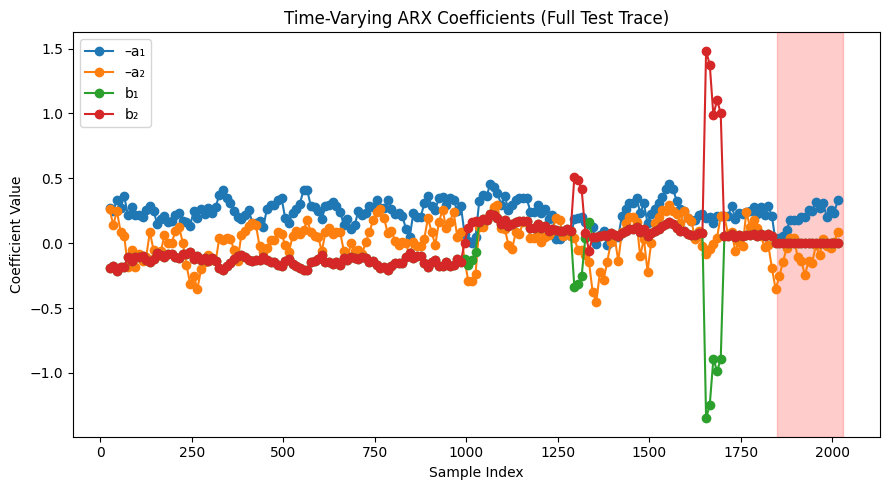

In [23]:
import matplotlib.pyplot as plt

# 1) Compute window‐center indices
centers_full = np.arange(len(thetas_full)) * hop + win_size/2

# 2) Unpack your anomaly bounds (in sample indices)
anom_start, anom_end = anomaly_windows[0]

# 3) Plot each θ over time and shade the anomaly
plt.figure(figsize=(9,5))
labels = ['–a₁','–a₂','b₁','b₂']
for i in range(4):
    plt.plot(centers_full, thetas_full[:, i], marker='o', label=labels[i])

# 4) Shade the anomaly span
plt.axvspan(anom_start, anom_end, color='red', alpha=0.2)

plt.xlabel("Sample Index")
plt.ylabel("Coefficient Value")
plt.title("Time‐Varying ARX Coefficients (Full Test Trace)")
plt.legend()
plt.tight_layout()
plt.show()

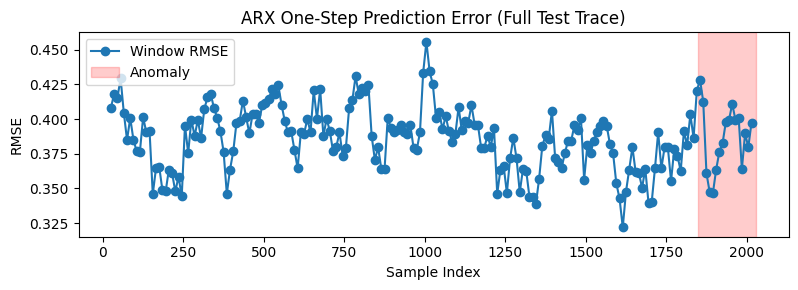

In [24]:
# Plot windowed RMSE across the full test
plt.figure(figsize=(8,3))
plt.plot(centers_full, rmses_full, '-o', label='Window RMSE')
# shade the anomaly region
plt.axvspan(anom_start, anom_end, color='red', alpha=0.2, label='Anomaly')
plt.xlabel("Sample Index")
plt.ylabel("RMSE")
plt.title("ARX One‐Step Prediction Error (Full Test Trace)")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
import os
import pandas as pd

# 1) Ensure the processed folder exists
out_dir = os.path.join("..", "data", "processed")
os.makedirs(out_dir, exist_ok=True)

# 2) Save the θ’s
theta_df = pd.DataFrame(
    thetas_full, 
    columns=['-a1','-a2','b1','b2']
)
theta_df.to_csv(os.path.join(out_dir, "arx_thetas_full.csv"), index=False)

# 3) Save the RMSEs
rmse_df = pd.DataFrame({'rmse': rmses_full})
rmse_df.to_csv(os.path.join(out_dir, "arx_rmses_full.csv"), index=False)

print("Saved θ & RMSE to data/processed/")

Saved θ & RMSE to data/processed/


In [26]:
import pandas as pd

# Load the saved coefficient & error files
theta_df = pd.read_csv("../data/processed/arx_thetas_full.csv")
rmse_df  = pd.read_csv("../data/processed/arx_rmses_full.csv")

print("θ (first 5 rows):")
display(theta_df.head())

print("\nRMSE (first 5 rows):")
display(rmse_df.head())

θ (first 5 rows):


,-a1,-a2,b1,b2
0,0.273322,0.262799,-0.189278,-0.189278
1,0.249431,0.139932,-0.172213,-0.172213
2,0.332086,0.248752,-0.214072,-0.214072
3,0.269481,0.087662,-0.180060,-0.180060
4,0.363636,0.055944,-0.181818,-0.181818



RMSE (first 5 rows):


,rmse
0,0.408081
1,0.418235
2,0.414923
3,0.429411
4,0.404664


## Using Functions

In [27]:
from src.ltv_id import fit_arx

# test it still reproduces your previous θ
θ_test = fit_arx(u_anom, y_anom2, na=2, nb=2, nk=1)
print("θ_test:", θ_test)

θ_test: [ 0.21224849 -0.07338145  0.00091783  0.00081367]


In [28]:
from src.ltv_id import sliding_arx

# parameters
na, nb, nk = 2, 2, 1
win_size, hop = 50, 10

thetas_full, rmses_full = sliding_arx(u_full, y_full, na, nb, nk, win_size, hop)
print("Windows:", thetas_full.shape[0], "×", thetas_full.shape[1])

Windows: 200 × 4
